In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
'''
    clustering done on the basis of how the income varies according to the age of the person/area in which he/she lives.
'''
df = pd.read_csv("income.csv")
df.head()


,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


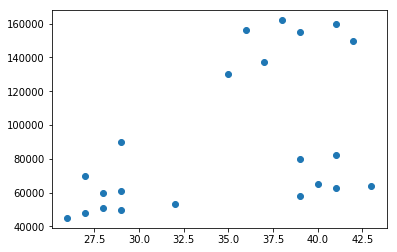

In [5]:
plt.scatter(df['Age'],df['Income($)'])

In [6]:
'''
Apparent that three clusters exist.
'''
km = KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [8]:
'''
fit and predict the number of clusters.
'''
y_predicted = km.fit_predict(df[['Age','Income($)']])


In [9]:
#Gives you labels on all the data sets
df["cluster"] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


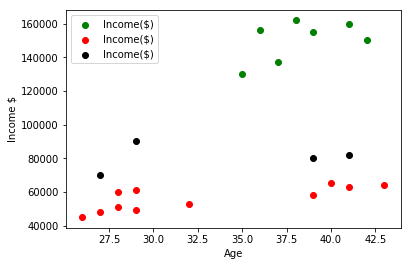

In [12]:
# get seperate df clusters 
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

## plot them

plt.scatter(df1['Age'],df1['Income($)'],color = 'green')
plt.scatter(df2['Age'],df2['Income($)'],color = 'red')
plt.scatter(df3['Age'],df3['Income($)'],color = 'black')

plt.xlabel('Age')
plt.ylabel('Income $')
plt.legend()

## incorrect plotting due to uneven scale of x and y axis.


In [14]:
# scale everything
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


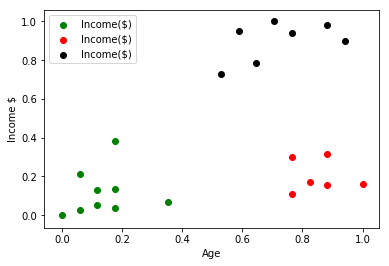

In [15]:
## perfect clustering.

km = KMeans(n_clusters=3)

y_predicted = km.fit_predict(df[['Age','Income($)']])
df["cluster"] = y_predicted
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

## plot them

plt.scatter(df1['Age'],df1['Income($)'],color = 'green')
plt.scatter(df2['Age'],df2['Income($)'],color = 'red')
plt.scatter(df3['Age'],df3['Income($)'],color = 'black')

plt.xlabel('Age')
plt.ylabel('Income $')
plt.legend()
